In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize the images to 16x16
x_train_resized = tf.image.resize(x_train[..., tf.newaxis], [16, 16]).numpy()
x_test_resized = tf.image.resize(x_test[..., tf.newaxis], [16, 16]).numpy()

# Check the shape of the resized images
print(x_train_resized.shape)   #(60000, 16, 16, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 16, 16, 1)


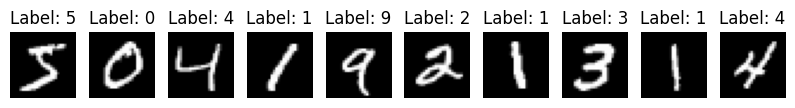

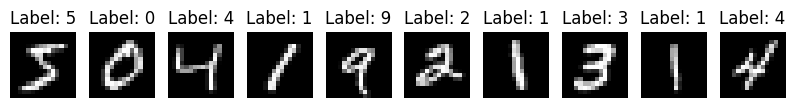

In [ ]:
import matplotlib.pyplot as plt

def visualize_mnist(images, labels, num_images, filename):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Remove the channel dimension and display as grayscale
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.savefig(filename, bbox_inches="tight")

# Visualize 5 normal images, and 5 resized images
visualize_mnist(x_train, y_train, num_images=10, filename = "og_mnist.png")
visualize_mnist(x_train_resized, y_train, num_images=10, filename = 'dimred_mnist.png')

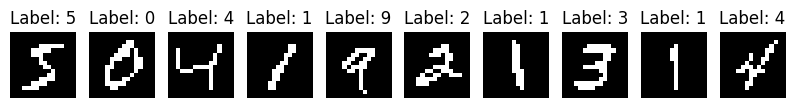

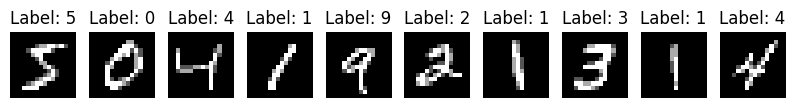

In [ ]:
import numpy as np
#Binarize pixels
x_train_binarized = (x_train_resized > 127).astype(int)

visualize_mnist(x_train_binarized, y_train, num_images=10, filename = "bin_mnist.png")

In [ ]:
#Make pixels into a 256 (16x16) length vector
x_dataset2 = x_train_binarized.reshape(x_train_binarized.shape[0], -1)
print(x_dataset2.shape)

(60000, 256)
(60000, 256)


In [ ]:
#This is the binary text file of MNIST data saved and imported into R for further data formatting
np.savetxt("bin_mnist.csv", x_dataset2, delimiter = ",")

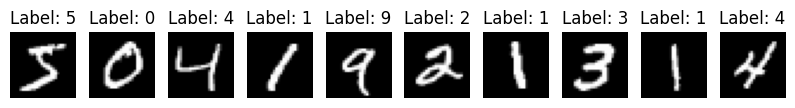

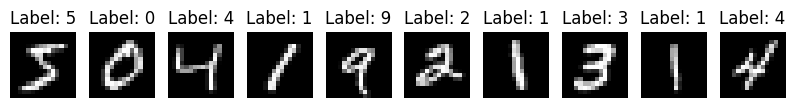

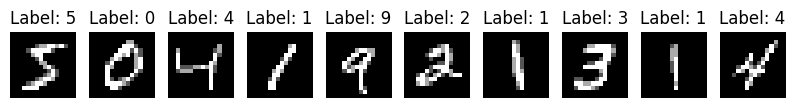

In [ ]:
#Visualising the first 10 MNIST digits
visualize_mnist(x_train, y_train, num_images=10, filename = "og_mnist.png")
visualize_mnist(x_train_resized, y_train, num_images=10, filename = "dimred_mnist.png")

In [ ]:
np.savetxt("labels_mnist.csv", y_train, delimiter=",") #Save labels to a text file

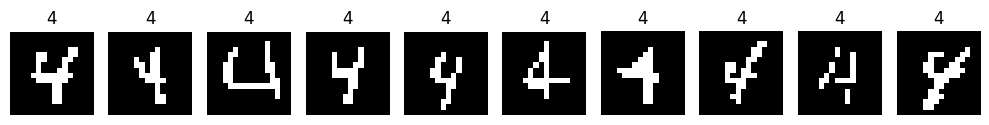

In [ ]:
#Get images of 4s (for example)
def get_digit_images(images, labels, digit):
    digit_indices = np.where(labels == digit)[0]  # Get indices of all '4's
    return images[digit_indices]

# Get all images of digit '4'
digit_4_images = get_digit_images(x_train_binarized, y_train, digit=4)

def visualize_random_digit_set(images, num_images=10):
    # Shuffle the images so we get a different random set each time
    np.random.shuffle(images)  # Shuffle in-place
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')  # Remove extra channel and display as grayscale
        plt.title(f"4")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize a random set of 10 examples of the digit '4'
visualize_random_digit_set(digit_4_images, num_images=10)


(10000, 256)


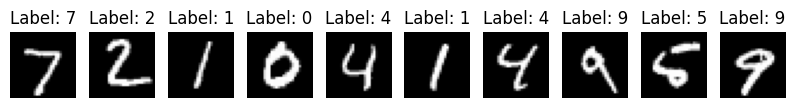

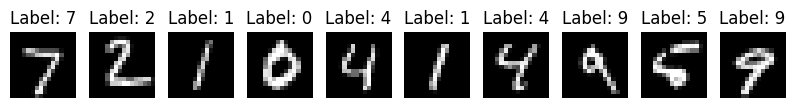

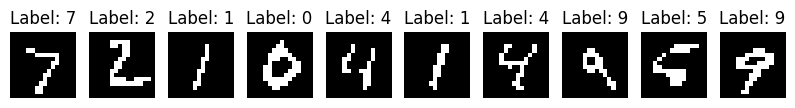

In [ ]:
#TEST SET
#Visualising the first 10 MNIST test-set digits

visualize_mnist(x_test, y_test, num_images=10, filename = "og_mnist_test.png")
visualize_mnist(x_test_resized, y_test, num_images=10, filename = 'dimred_mnist_test.png')

#Binarised the MNIST test-set
import numpy as np
x_test_binarized = (x_test_resized > 127).astype(int)

visualize_mnist(x_test_binarized, y_test, num_images=10, filename = "bin_mnist_test.png")

x_test_dataset2 = x_test_binarized.reshape(x_test_binarized.shape[0], -1)
print(x_test_dataset2.shape)

np.savetxt("bin_mnist_test.csv", x_test_dataset2, delimiter = ",")
np.savetxt("labels_mnist_test.csv", y_test, delimiter=",")